# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [43]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
heroes_df.head()


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [44]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [45]:
 heroes_df.columns
    

Index(['Unnamed: 0', 'name', 'Gender', 'Eye color', 'Race', 'Hair color',
       'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [46]:
heroes_df.drop(columns='Unnamed: 0', inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [47]:
print(heroes_df.info(), heroes_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB
None            Height      Weight
count  734.000000  732.000000
mean   102.254087   43.855191
std    139.624543  130.823733
min    -99.000000  -99.000000
25%    -99.000000  -99.000000
50%    175.000000   62.000000
75%    185.000000   90.000000
max    975.000000  900.000000


In [48]:
print(powers_df.info(),powers_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB
None        hero_names Agility Accelerated Healing Lantern Power Ring  \
count         667     667                 667                667   
unique        667       2                   2                  2   
top         Beast   False               False              False   
freq            1     425                 489                656   

       Dimensional Awareness Cold Resistance Durability Stealth  \
count                    667             667        667     667   
unique                     2               2          2       2   
top                    False           False      False   False   
freq                     642             620        410     541   

       Energy Absorption Flight    ...     Web Creation Reality Warping  \
count                667    667    ...              667             667

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

Publisher contains 15 NaN values. small subset of df of length 734. delete entries (also contains 2 missing weight entries- bonus!)

height and weight columns contain values for -99. this is impossible and can be assumed to be missing value placeholders. weight null entries eliminated in Publisher.dropna()


height contains 225 entries with -99 value - too many to want to drop. impute median


weight contains 208 entries with -99 value - too many to want to drop. impute median


Skin color contains 648 values for '-' as an unknown or not relevant placeholder. column mostly empty lets drop column


Gender contains 27 values of '-' and Race contains 297 values of '-' and alignment contains 6 values of '-' these I'm going to leave in place as this is more a feature than a bug for the dataset showing the complexitty of the universes they describe not fitting into neat labels (eyeroll)


Hair Color and Eye color each contain 163 entries for '-', object not easily filled with a median or common value. Don't know what would be best there. gonna leave it alone

Powers_df contains no null values woohoo! all values Boolean except for hero_names all are unique so no indication of placeholder values

In [49]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [51]:
heroes_df.Publisher.unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', nan, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [41]:

#heroes_df.Publisher.fillna('missing', inplace=True)
#heroes_df.loc[heroes_df['Publisher']=='missing']
#just looking

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,missing,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,missing,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,missing,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,missing,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,missing,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,missing,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,missing,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,missing,grey,bad,NaN
348,Jack Bauer,Male,-,-,-,-99.0,missing,-,good,-99.0
354,Jason Bourne,Male,-,Human,-,-99.0,missing,-,good,-99.0


In [52]:
heroes_df.dropna(inplace=True)
heroes_df.isna().sum()
#no more null entries!

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [58]:
print(heroes_df.Weight.value_counts().head(),'\n',heroes_df.Height.value_counts().head())

-99.0    225
 79.0     23
 54.0     23
 81.0     22
 90.0     19
Name: Weight, dtype: int64 
 -99.0     208
 183.0     59
 188.0     51
 180.0     38
 178.0     37
Name: Height, dtype: int64


In [57]:
heroes_height_median=heroes_df.Height.loc[heroes_df.Height>0].median()
heroes_height_median
#find median without -99 placeholders 

183.0

In [59]:
heroes_df.Height.replace(to_replace=-99, value=heroes_height_median,inplace=True)
heroes_df.Height.value_counts().head()

183.0    267
188.0     51
180.0     38
178.0     37
185.0     35
Name: Height, dtype: int64

In [60]:
heroes_weight_median=heroes_df.Weight.loc[heroes_df.Weight>0].median()
heroes_weight_median

81.0

In [61]:
heroes_df.Weight.replace(to_replace=-99, value=heroes_weight_median,inplace=True)
heroes_df.Weight.value_counts().head()

81.0    247
54.0     23
79.0     23
90.0     19
52.0     15
Name: Weight, dtype: int64

In [62]:
heroes_df['Skin color'].value_counts()

-                 649
green              21
blue                9
red                 8
white               7
silver              5
grey                4
gold                3
purple              3
yellow              2
pink                2
black               1
gray                1
blue-white          1
orange / white      1
red / black         1
orange              1
Name: Skin color, dtype: int64

In [65]:
heroes_df.drop(columns='Skin color', inplace=True)
heroes_df.columns

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Alignment', 'Weight'],
      dtype='object')

In [67]:
heroes_df.Gender.value_counts()

Male      494
Female    198
-          27
Name: Gender, dtype: int64

In [68]:
heroes_df.loc[heroes_df['Gender']=='-']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
87,Bird-Brain,-,-,-,-,183.0,Marvel Comics,good,81.0
112,Blaquesmith,-,black,-,No Hair,183.0,Marvel Comics,good,81.0
133,Box III,-,blue,-,Blond,193.0,Marvel Comics,good,110.0
134,Box IV,-,brown,-,Brown / Black,183.0,Marvel Comics,good,81.0
160,Captain Universe,-,-,God / Eternal,-,183.0,Marvel Comics,good,81.0
165,Cecilia Reyes,-,brown,-,Brown,170.0,Marvel Comics,good,62.0
178,Clea,-,-,-,White,183.0,Marvel Comics,good,81.0
196,Cypher,-,blue,-,Blond,175.0,Marvel Comics,good,68.0
234,Ego,-,-,-,-,183.0,Marvel Comics,bad,81.0
249,Fabian Cortez,-,blue,-,Brown,196.0,Marvel Comics,bad,96.0


In [69]:
heroes_df.Race.value_counts()

-                     297
Human                 204
Mutant                 62
God / Eternal          14
Human / Radiation      11
Cyborg                 10
Symbiote                9
Android                 9
Alien                   7
Kryptonian              7
Demon                   6
Atlantean               5
Alpha                   5
Asgardian               5
Inhuman                 4
Cosmic Entity           4
Human / Altered         3
Animal                  3
New God                 3
Demi-God                2
Eternal                 2
Vampire                 2
Amazon                  2
Human / Cosmic          2
Saiyan                  2
Metahuman               2
Frost Giant             2
Human-Kree              2
Clone                   1
Strontian               1
                     ... 
Mutant / Clone          1
Planet                  1
Yoda's species          1
Korugaran               1
Xenomorph XX121         1
Human-Spartoi           1
Zen-Whoberian           1
Gorilla     

In [70]:
heroes_df.Alignment.value_counts()

good       484
bad        205
neutral     24
-            6
Name: Alignment, dtype: int64

In [71]:
heroes_df['Hair color'].value_counts()

-                   163
Black               154
Blond                99
Brown                85
No Hair              74
Red                  51
White                23
Auburn               13
Green                 8
Strawberry Blond      7
Purple                5
Grey                  5
Brown / White         4
Silver                4
blond                 3
black                 3
Blue                  3
Orange                2
Yellow                2
Pink                  1
Magenta               1
Gold                  1
Red / White           1
Black / Blue          1
Red / Grey            1
Brownn                1
Orange / White        1
Brown / Black         1
Indigo                1
Red / Orange          1
Name: Hair color, dtype: int64

In [72]:
heroes_df.loc[heroes_df['Hair color']=='-'].head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
10,Agent Zero,Male,-,-,-,191.0,Marvel Comics,good,104.0
14,Alex Mercer,Male,-,Human,-,183.0,Wildstorm,bad,81.0
15,Alex Woolsly,Male,-,-,-,183.0,NBC - Heroes,good,81.0
18,Allan Quatermain,Male,-,-,-,183.0,Wildstorm,good,81.0
19,Amazo,Male,red,Android,-,257.0,DC Comics,bad,173.0


In [73]:
heroes_df['Eye color'].value_counts()

blue                       224
-                          163
brown                      123
green                       73
red                         46
black                       22
yellow                      18
white                       17
hazel                        6
grey                         6
purple                       4
gold                         3
amber                        2
yellow (without irises)      2
violet                       2
indigo                       1
bown                         1
green / blue                 1
yellow / red                 1
white / red                  1
blue / white                 1
yellow / blue                1
silver                       1
Name: Eye color, dtype: int64

In [74]:
heroes_df.loc[heroes_df['Eye color']=='-'].head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
10,Agent Zero,Male,-,-,-,191.0,Marvel Comics,good,104.0
14,Alex Mercer,Male,-,Human,-,183.0,Wildstorm,bad,81.0
15,Alex Woolsly,Male,-,-,-,183.0,NBC - Heroes,good,81.0
17,Alien,Male,-,Xenomorph XX121,No Hair,244.0,Dark Horse Comics,bad,169.0
18,Allan Quatermain,Male,-,-,-,183.0,Wildstorm,good,81.0


In [81]:
sorted(powers_df.isna().sum(), reverse=False)[:5]

[0, 0, 0, 0, 0]

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [103]:
heroes_df_name_index=heroes_df.set_index('name')
heroes_df_name_index.head()
powers_df_name_index=powers_df.rename(columns={'hero_names':'name'}).set_index('name')
powers_df_name_index.head()
heroes_powers=heroes_df_name_index.join(powers_df_name_index,how='inner',)
heroes_powers.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,True,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,bad,81.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [106]:
male=heroes_df.loc[heroes_df.Gender=='Male']
female=heroes_df.loc[heroes_df.Gender=='Female']


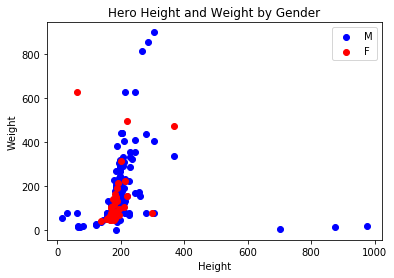

In [117]:
plt.scatter(x=male.Height, y=male.Weight, color='blue')
plt.scatter(x=female.Height, y=female.Weight, color='red')
plt.title('Hero Height and Weight by Gender')
plt.legend('MF')
plt.ylabel('Weight')
plt.xlabel('Height')
plt.show()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

I'm goign to reload the dataframe because I definitely broke this earlier when I imputed medians for height and weight irrespective of gender

In [120]:
heroes_df2=pd.read_csv('heroes_information.csv')
heroes_df2.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [122]:
heroes_df2.drop(columns='Unnamed: 0',inplace=True)
heroes_df2.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [123]:
heroes_df2.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

convert missing values to place holder = -99

In [127]:
heroes_df2.Weight.fillna(value=-99, inplace=True)

In [129]:
heroes_df2.Weight.value_counts().head()

-99.0    239
 79.0     23
 54.0     23
 81.0     22
 90.0     19
Name: Weight, dtype: int64

In [138]:
male_heroes_df = heroes_df2.loc[heroes_df2.Gender=='Male']
female_heroes_df = heroes_df2.loc[heroes_df2.Gender=='Female']

def show_distplot(dataframe, gender, column_name):
    plt.plot()
    sns.distplot(dataframe[column_name])
    plt.title(f'{gender} Heroes {column_name} distribution')
    plt.ylabel('Probability Density')
    plt.show()

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


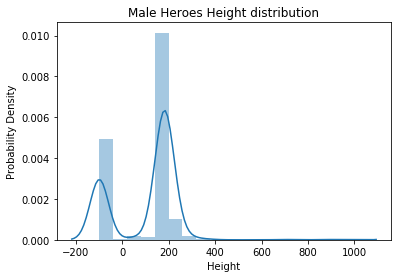

In [139]:
# Male Height
show_distplot(heroes_df2, 'Male', 'Height')

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


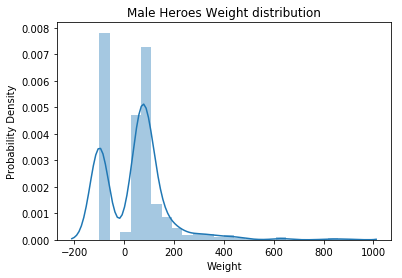

In [141]:
# Male Weight
show_distplot(heroes_df2, 'Male', 'Weight')

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


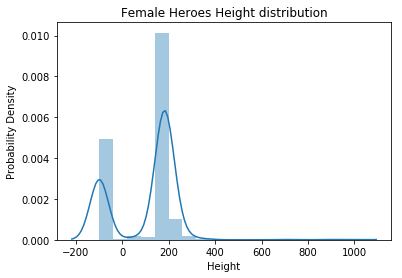

In [142]:
# Female Height
show_distplot(heroes_df2, 'Female', 'Height')

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


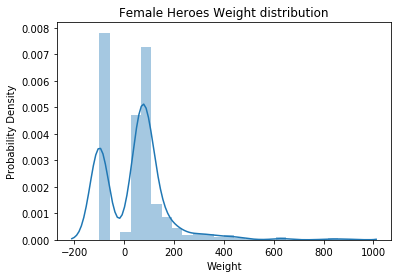

In [143]:
# Female Weight
show_distplot(heroes_df2, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data